<a href="https://colab.research.google.com/github/benrock40/data-analysis/blob/main/deliverable2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [ ]:
def drop_data(lst, df, axs):
  
  df.drop(lst, axis=axs, inplace=True)


In [ ]:
def merge_df(lst_df, axs):
  final = pd.concat(lst_df, axis = axs)
  return final


SerieA-Team-League-Stats.csv is the name of data that describes the general situation of the league table. The descriptions of the columns in this data are as follows: RkLeag - League Rank Squad: Team MP: Match Played W: Team Wins D: Team Draws L : Team: Team Losts GF: Team Goals GA: Team Goal Conceded GD: Team Goal Difference(Average) Pts: Team Season Points xG : Team Expected Goals xGA: Team Expected Goals Allowed xGD : Team Expected Goals Differences xGD : Team Expected Goals Differences per 90 minutes Atttendance : Team Tota Attendances

In [ ]:

with open('SerieA-Team-League-Stats.csv','r') as f:
    dialect = csv.Sniffer().sniff(f.readline()) # finds the delimiters automatically
    #one file may have ; as data delimiter while another as ,
    #so it creates problem for csv.reader which looks for , as delimter as default 
    f.seek(0) #goto starting line of file
    # read file with dialect delimiter
    reader = csv.reader(f, dialect) #readfile with the above delimiter
    # save to list of rows
    list_rows  = [line for line in reader]
    
    
    header = list_rows[0] #read first row header
    data = {}
    for i,key in enumerate(header): #enumerate through the rows
      
      value = [row[i] for row in list_rows] #take only row[i] of list_rows
      data.update({key: value[1:]}) #append that value with key to the "data" dictionary




The above code transforms the above SerieA-Team-League-Stats.csv file to dictionary of list

In [ ]:
data

In [ ]:
df0 = pd.DataFrame.from_dict(data) #create df0 based on "data" DoL
df0 = df0.set_index('Squad') #set team names as index to access data more easily



In [ ]:
lst = ['MP','W', 'D', 'L','GD', 'Pts', 'xGA', 'xGD', 'xGD/90', 'Attendance']

drop_data(lst, df0, 1)

The above dataframe had lots of unnecessary data for the purposes of my central question like attendace and MP(match played) etc, so this led me to use the self created drop_data method(function), which takes the list of unnecesssary data to delete and passes it along woth the dataframe and the axis( 1 in this case indicating column, while 0 indicated rows or index).

In [ ]:
df0

,RkLeag,GF,GA,xG
Squad,,,,
Milan,1,69,31,63.1
Inter,2,84,32,81.4
Napoli,3,74,31,59.4
Juventus,4,57,37,51.5
Lazio,5,77,58,55.8
Roma,6,59,43,63.7
Fiorentina,7,59,51,58.8
Atalanta,8,65,48,66.2
Hellas Verona,9,65,59,51.8


**Mapping independent and dependent variables**

Squad(index column): Team name: indepenent variable

RkLeag: League ranking : dependent variable: dependent on Pts(points): not inclued in the cleaned dataframe

GF: Total goals scored: independent variable

GA: Total goals conceded: independent variable

xG: Expected goals : dependent variable: dependent on chances created




**SerieA-Team-Shooting-Stats.csv** is the name of data that describes the conversion rate of shots into goals for all teams. The descriptions of the columns in this data are as follows: Squad: Team Gls : Team Goals Sh : Team Total Shots SoT : Shots on Target SoTRt : Shots on Target Conversion Rate Shd90 : Shots per 90 minutes SoTd90: Shots on target per 90 min GdSh :Goals per shot GdSoT : Goals per shot on target Dist: average distances, from goal of shot FK : free-kick PK : penalty kick made PKatt attempted penalty kick xG : expected goals npxG : non-penalty expected goals npxGdSh : non-penalty expected goals per shot GmxG : Goal minus expected goals npGmxG : Non-penalty goals minus expected goals

This helps to determine how attacking they are

In [ ]:
with open('SerieA-Team-Shooting-Stats.csv','r') as f:
    dialect = csv.Sniffer().sniff(f.readline()) # finds the delimiters automatically
    #one file may have ; as data delimiter while another as ,
    #so it creates problem for csv.reader which looks for , as delimter as default 
    f.seek(0) #goto starting line of file
    # read file with dialect delimiter
    reader = csv.reader(f, dialect) #readfile with the above delimiter
    # save to list of rows
    list_rows  = [line for line in reader]
    
    
    header = list_rows[0] #read first row header
    data1 = list()
    for i,key in enumerate(header): #enumerate through the rows
      
      value = [row[i] for row in list_rows] #take only row[i] of list_rows
      data1.append([key] + value[1:]) #append that value with key to the "data1" list of list


Create list of list from above csv

In [ ]:
data1

In [ ]:
temp = list()

for i,key in enumerate(data1): #make the keys as one rows and the column values appended to make multiple rows
  value = [row[i] for row in data1]
  temp.append(value)
#basically set the list of list to the format when the reader had just read the file

df1 = pd.DataFrame(temp[1:], columns = temp[0]) #create df1 based on the temp lol columns as temp[0] 
#which contains headers
df1 = df1.set_index('Squad') #set team names as index to access data


In [ ]:
lst = ['Gls', 'SoT', 'SoTRt', 'Shd90', 'SoTd90', 'GdSh', 'GdSoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxGdSh', 'GmxG', 'npGmxG']

drop_data(lst, df1, 1)

My data in the df1 dataframe was formatted really nicely and i just had to remove unused columns to make the data more readable.For the purposes of my project, i just needed the total shots by the 20 teams, so i dropped the other columns in this dataframe using drop_data method whose use case has been explained above

In [ ]:
df1

,Sh
Squad,
Atalanta,597
Bologna,442
Cagliari,419
Empoli,495
Fiorentina,502
Genoa,402
Hellas Verona,456
Inter,670
Juventus,522


**Mapping independent and dependent variable**

Squad(index column) : team name: independent variable

Sh: Total team shots : independent variable

SerieA-Team-Possession-Stats.csv is the name of data that describes the touches, dribblers, and carries for all teams. The descriptions of the columns in this data are as follows: Squad: Team Poss : Team Possesion TotTouch : Total Touches DefPenTouc : Touches in Defensive penalty area Def3rdTouc : Touches in Defensive 3rd Mid3rdTouc : Touches in Middle 3rd Att3rdTouc : Touches in Attacking 3rd AttPenTouc : Touches in Attacking penalty area LiveTouc : Live-ball touches SuccDrib : Successful dribbles AttDrib : Dribbles attempted SuccDribRt : Minimum 5 dribbles per squad game Megs : Number of times a player dribbled the ball through opposition player's leg TotCarr : Number of times player controlled the ball with their feet TotDistCarr : Total distances, in yards, carries PrgDistCarr : Progressive distances carries ProgCarr : Progressive carries 1/3Carr : Carries that enter the 1/3 of the pitch closest the goal CPA : Carries into the 18 yard box MisCarr : Number of times a player failed when attempting to gain to control a ball DisCarr : Number of times a player loses control of the ball TargRec : Number of times a player target of an attempting a pass SucRec : Number of times a player successfully received a pass RecRt : Percentage time of a player successfully received a pass ProgRec : Progressive Pass received

This helps determine if the team is possesion based or not

In [ ]:
df2 = pd.read_csv("SerieA-Team-Possession-Stats.csv", sep =';', engine='python')
#create df2 based on the above csv file and read using ';' as delimiter as we know
#the dataset has ';' delimiter and we have extra arguments
df2 = df2.set_index('Squad') #set team names as index to access data


In [ ]:
lst = ['Def3rdTouc', 'Poss','DefPenTouc', 'AttPenTouc', 'TotTouc','LiveTouc', 'SuccDrib', 'AttDrib', 'SuccDribRt', 'Megs', 'TotCarr', 'TotDistCarr', 'PrgDistCarr', '1/3Carr', 'CPA', 'MisCarr', 'DisCarr', 'TargRec', 'SucRec', 'RecRt', 'ProgRec', 'ProgCarr']

drop_data(lst, df2, 1)


This dataframe was the same as the other dataframes as thyer were foramtted really nicely as i required and i just had to use drop_data method to remove the unnecessary columns in the dataframe.

In [ ]:
df2

,Mid3rdTouc,Att3rdTouc
Squad,,
Atalanta,12228,8051
Bologna,10548,5307
Cagliari,9206,4681
Empoli,9198,5700
Fiorentina,11730,6201
Genoa,9585,4720
Hellas Verona,10483,5966
Inter,11769,7122
Juventus,11754,5663


**Mapping independent and dependent variable**

Squad(index column): team name: independent variable

Mid3rdTouc: total touches in midfield 3rd: independent variable

Att3rdTouc : total touches in midfield 3rd: independent variable

SerieA-Team-Defensive-Actions-Stats.csv is the name of data that describes the tackles, pressures, and blocks of the ball for all teams. The descriptions of the columns in this data are as follows: Squad: Team TotTkl : Total tackles TotTklW : Tacleswon Def3rdTck : Tackles in Defensive 3rd Mid3rdTck : Tackles in Middle 3rd Att3rdTck : Tackles in Attacking 3rd TklWvsDrib AttTckvsDrib TklWvsDribRt PastDribNTck PressTot : Total Pressures SuccPress : Successful Pressures PressRt : Successful Pressure Rate Def3rdPres : Pressures in Defensive 3rd Mid3rdPres: Pressures in Middle 3rd Att3rdPres: Pressures in Attacking 3rd TotBlocBal : Number of times blocking a ball by standing in its path ShBlocBall : Number of times blocking a shot by standing in its path ShSvBloc : Number of times blocking a shot that was on target, by standing in its path PassBlock :Number of times blocking a pass by standing in its path Int : Interceptions TklpInt : Tackles and interceptions Clear: Clearances Err : Errors

This helps determine how defensive the teams are

In [ ]:
df3 = pd.read_csv("SerieA-Team-Defensive-Actions.csv", sep =';', engine='python')
#create df2 based on the above csv file and read using ';' as delimiter as we know
#the dataset has ';' delimiter and we have extra arguments
df3 = df3.set_index('Squad') #set team names as index to access data


In [ ]:
lst = ['TotTkl','Def3rdPres','Mid3rdPres','Att3rdPres' ,'TklWvsDrib', 'AttTckvsDrib', 'TklWvsDribRt', 'PastDribNTck', 'TotBlocBal', 'TklpInt', 'Err', 'ShSvBloc', 'PassBlock', 'Int', 'Clear', 'PressRt', 'SuccPress', 'PressTot', 'TotTklW']

drop_data(lst, df3, 1)

This dataframe was the same as the other dataframes as they were foramtted really nicely as i required and i just had to use drop_data method to remove the unnecessary columns in the dataframe. The list of removed columns is in the above cell.

In [ ]:
df3

,Def3rdTck,Mid3rdTck,Att3rdTck,ShBlocBall
Squad,,,,
Atalanta,285,300,110,112
Bologna,297,215,80,152
Cagliari,284,242,76,145
Empoli,332,246,97,195
Fiorentina,253,219,82,101
Genoa,355,320,131,154
Hellas Verona,300,235,79,115
Inter,263,253,105,127
Juventus,285,229,83,154


**Mapping independent and dependent variable**


Squad(index column): team name: independent variable

Def3rdTck: tackles in defensive 3rd: independent variable

Mid3rdTck: tackles in midfield 3rd: independent variable

Att3rdTck: tackles in attacking 3rd: independent variable

ShBlocBall : total shot blocked: independent variable





Using all of the dataset i can determine the playstyle of the teams based on ranking and whether the ranking tell us how defensive or offensive a team is.

But i have decided that i would not do it for multiple leagues just serie a, as it would take a lot more time to sort thorugh the data

In [ ]:
lst_df = [df0, df1, df2, df3]
final = merge_df(lst_df, 1)
final = final.reset_index()



This above cell is used to merge all the cleaned and curated dataframes into a single dataframe called final.I used the self created merge_df method to concatenate the dataframe based on "squad" column(which is common in all dataframes). The merge_df takes the list of datframe to merge and the axis thriough which to merge(0 by rows and 1 by columns). This merged dataframe makes it easier to read data, and makes it easier to take the dataframe and create bar graphs to answer the central question more easily.

In [ ]:
final

,Squad,RkLeag,GF,GA,xG,Sh,Mid3rdTouc,Att3rdTouc,Def3rdTck,Mid3rdTck,Att3rdTck,ShBlocBall
0,Milan,1,69,31,63.1,593,11306,6412,350,290,116,125
1,Inter,2,84,32,81.4,670,11769,7122,263,253,105,127
2,Napoli,3,74,31,59.4,567,13264,7084,289,238,90,121
3,Juventus,4,57,37,51.5,522,11754,5663,285,229,83,154
4,Lazio,5,77,58,55.8,448,13603,6343,264,251,86,155
5,Roma,6,59,43,63.7,596,11145,5806,325,278,83,101
6,Fiorentina,7,59,51,58.8,502,11730,6201,253,219,82,101
7,Atalanta,8,65,48,66.2,597,12228,8051,285,300,110,112
8,Hellas Verona,9,65,59,51.8,456,10483,5966,300,235,79,115
9,Torino,10,46,41,48.8,NaN,10848,6308,248,250,87,120


In [ ]:
temp = ["RkLeag", "xG", 'GF', 'GA', 'Mid3rdTouc', 'Att3rdTouc', 'Def3rdTck', 'Mid3rdTck', 'Att3rdTck', 'ShBlocBall']

final[temp] = final[temp].apply(pd.to_numeric)

final

,Squad,RkLeag,GF,GA,xG,Sh,Mid3rdTouc,Att3rdTouc,Def3rdTck,Mid3rdTck,Att3rdTck,ShBlocBall
0,Milan,1,69,31,63.1,593,11306,6412,350,290,116,125
1,Inter,2,84,32,81.4,670,11769,7122,263,253,105,127
2,Napoli,3,74,31,59.4,567,13264,7084,289,238,90,121
3,Juventus,4,57,37,51.5,522,11754,5663,285,229,83,154
4,Lazio,5,77,58,55.8,448,13603,6343,264,251,86,155
5,Roma,6,59,43,63.7,596,11145,5806,325,278,83,101
6,Fiorentina,7,59,51,58.8,502,11730,6201,253,219,82,101
7,Atalanta,8,65,48,66.2,597,12228,8051,285,300,110,112
8,Hellas Verona,9,65,59,51.8,456,10483,5966,300,235,79,115
9,Torino,10,46,41,48.8,NaN,10848,6308,248,250,87,120


It is used to convert the string datatypes to numeric to allow for display in graphs

***Central question***

**What are the playstyles of different teams in the serie a(italian league).The different playstyles might be defensive or offensive, and whether or not the playstyle is a indication of how low or high the team might be ranked**

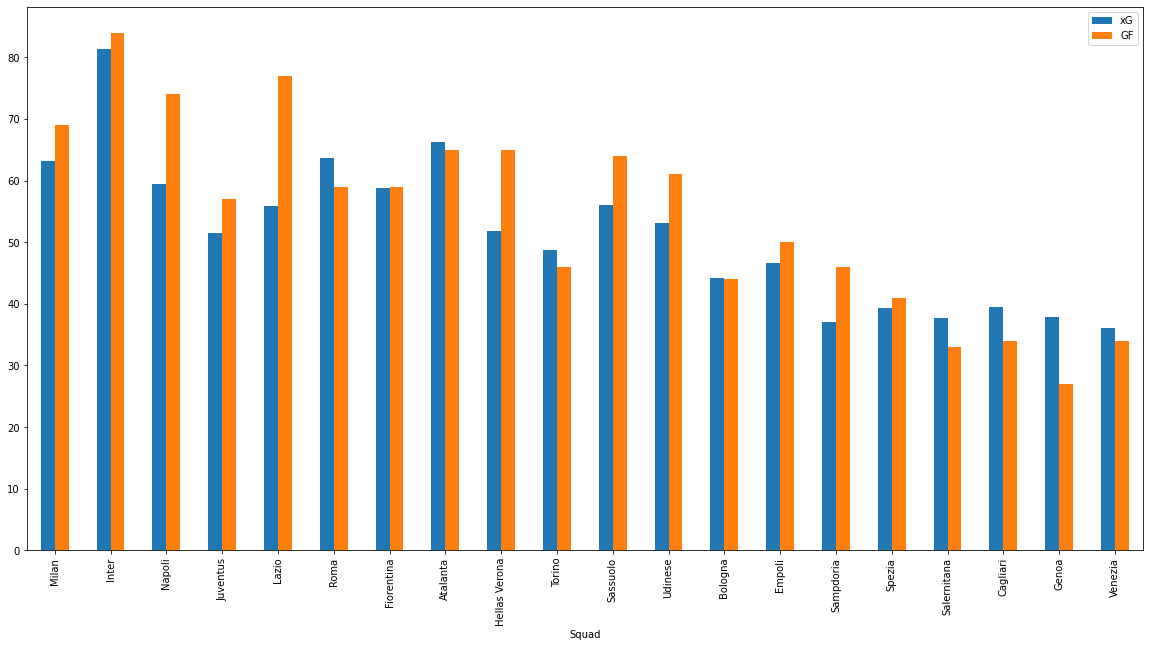

In [ ]:
final.plot(x='Squad', y=['xG', 'GF'], kind="bar", figsize=(20,10))

The above bargraph that plots the teams in x axis by the rankings and the y axis as xG(expected goal) and GF(Goals scored), show the higher ranking teams like milan to have more xg and goals scored and the bar graph has a descending slope as we go down in rankings. This is not absolute proof that higher rankings = more attacking teams, as more goals mean more points and consquently higher rankings but combined with the data from other metrics in the below bar graphs we can form a resonable opinion.

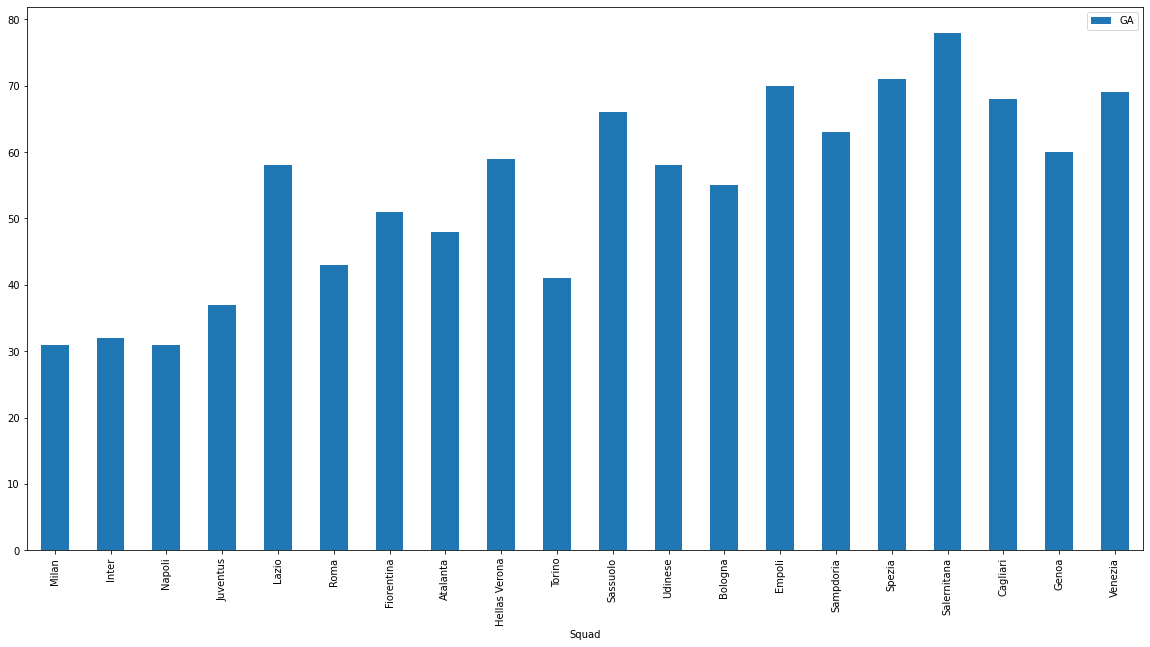

In [ ]:
final.plot(x='Squad', y=['GA'], kind="bar", figsize=(20,10))

The above bar graph shows the GA(goals conceded) in y axis vs the team names sorted by their league rankings in x axis.
The above bar graph shows that teams at higher rankings concede less goals and lower ranked teams like (genoa, venezia) concede more goals. This is evidenced by the increasing slope of the bar graph as we go from left to right.

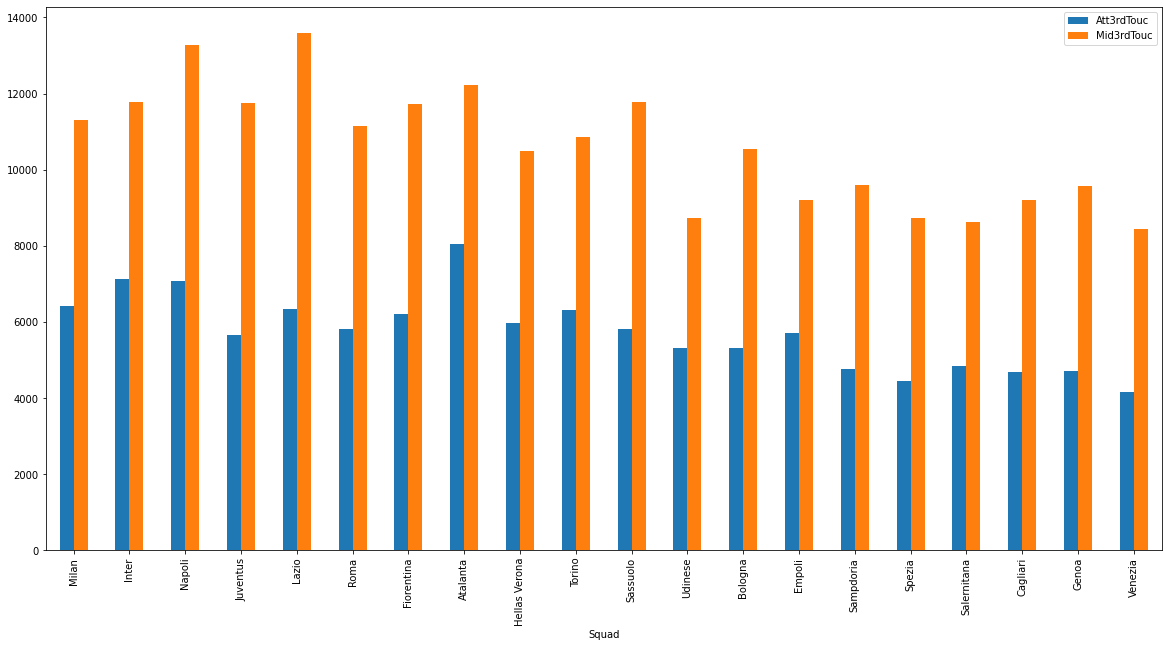

In [ ]:
final.plot(x='Squad', y=['Att3rdTouc', 'Mid3rdTouc'], kind="bar", figsize=(20,10))

The above bar graph plots the squad name in x axis and plots Att3rdTouc(total team touches in the attacking 3rd) and Mid3rdTouc(total team touches in the midfield 3rd) in the y axis. The purpose of the plot is to see whether or not the higher ranking teams and mid table have more possesion in the attacking 3rd and midfield 3rd. As evidenced by the bar graph above, the top 12 teams have higher possesion in the attacking and the midfield 3rd. There is a general consensus that attacking teams have more touches in midfield and attack. This is more interesting when you notice that higher ranking teams have more touches in those two parts of field.Looking at this, we can infer that teams with more attacking ideologies have higher ranking in the table as evidenced by the slightly decreasing slope of the bar graph.

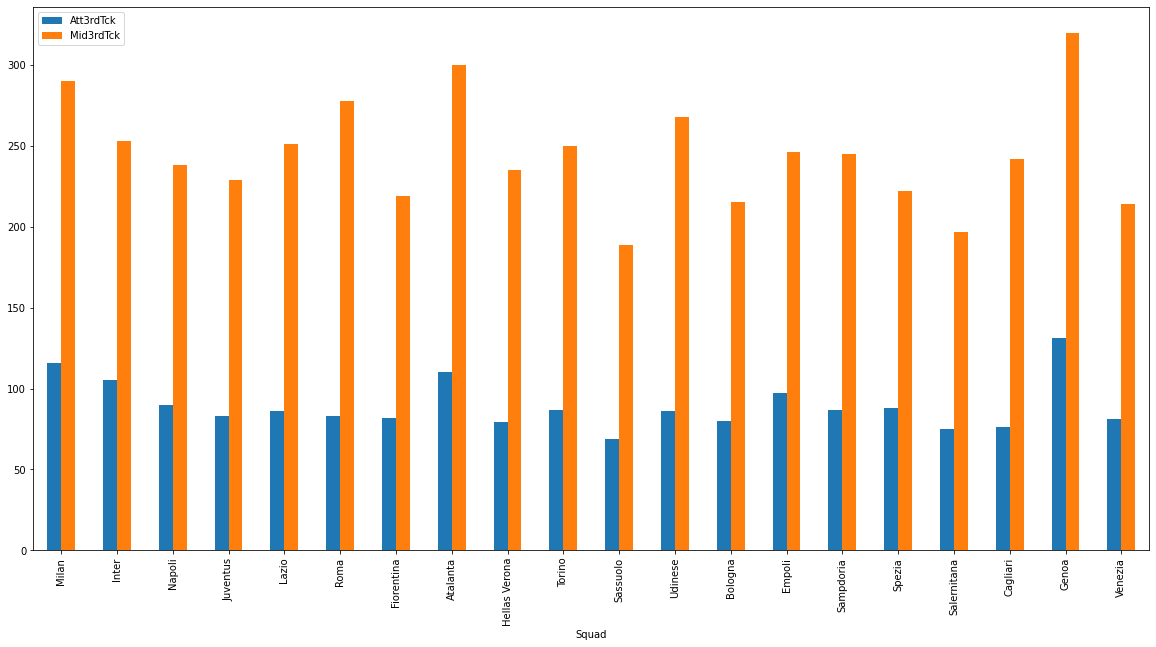

In [ ]:
final.plot(x='Squad', y=['Att3rdTck', 'Mid3rdTck'], kind="bar", figsize=(20,10))

The above bar graph plots the team name in x axis and it plots Att3rdTck(Tackles in the attacking 3rd) and Mid3rdTck(tackles in the midfield 3rd). There are couple of things we can infer from this graph.With a few exceptions, the teams in higher ranking like "Milan" and "Inter", have higher tackles in those areas as they are expected to win back the ball as soon as they lose it. While there are exxeptions like "Genoa" who have many tackles in the midfield 3rd, there is a weak pattern with attacking teams having more tackles in the attacking areas and defensive teams having less tackles.This also implies that attacking team have higher ranking overall.

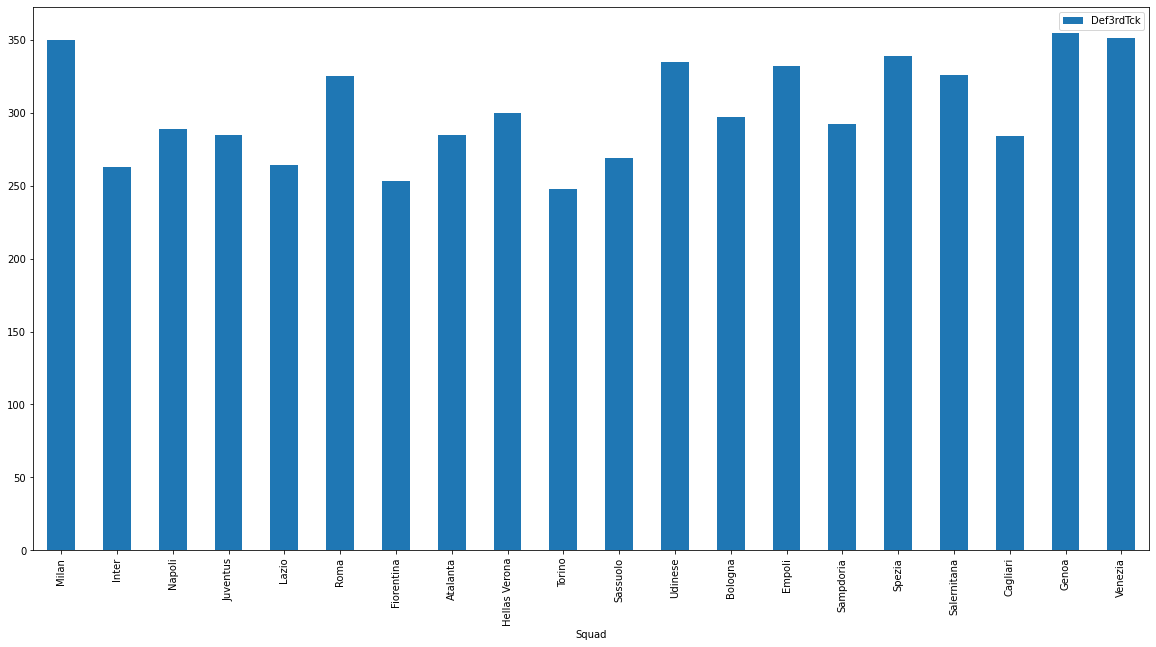

In [ ]:
final.plot(x='Squad', y=['Def3rdTck'], kind="bar", figsize=(20,10))

The above graph plots the team names in x - axis and plots Def3rdTck(tackles in the defensive 3rd).The purpose of this graph is to see whether or not lower ranking teams are more defensive and as a result have more tackles in the defensice 3rd.If we look at the trend from middle table teams to the lower rankied teams there is a incresing slope indicating more tackles. But as we can see that the top ranked teams also have high amount of tackles in the defensiv third.This can be attributed to attacking teams being aggresive in order to win back the ball quickly for another attack.

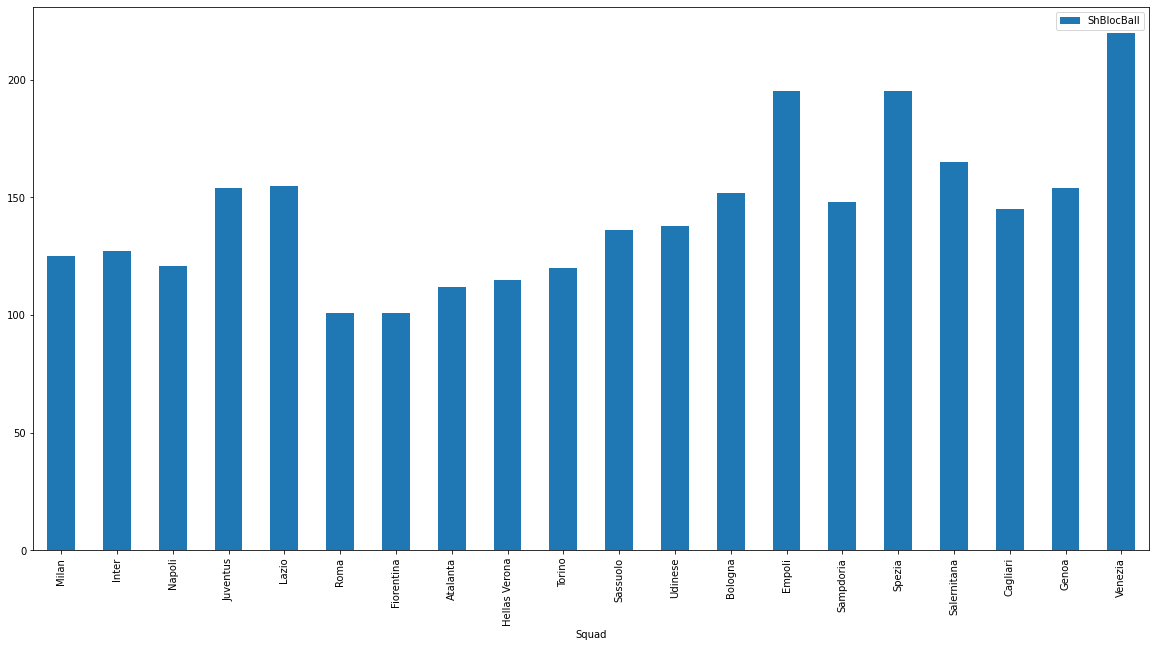

In [ ]:
final.plot(x='Squad', y=['ShBlocBall'], kind="bar", figsize=(20,10))

The above bar graph plots the team names in order of their league rankings in x-axis and plots the ShBlocBall(no of shots blocked).This graph shows relatively increasing slope from 6th place team to the 20th place team with a few exceptions.The top teams also have realtively low shots blocked. This can be a good indicator that top ranked teams play more offensively.

**Conclusion**

The inculsion of the above bar graphs was to show the playstyles of the various teams in the league. While a single bar graph might not be sufficent to answer whether or not lower ranked teams are more defensive, the inclusion of many such bar graphs about various datas that show that as you go down in rankings, the teams play more defensively. It is difficult to indicate whether or not playing defensive means you are lower ranked as there were some higher ranked teams being defensive when judged by some specific metric. While not a conclusive indicator of playstyle influencing rankings, the above bar graphs give an interesting idea about the type of playstyle the differntly ranked teams played in the 2021-2022 edition of the italian league(Serie A).

References

https://drive.google.com/drive/u/2/folders/1u6eE8o2jldIKWNM9tj1s5QX8Ok1fzj15